## sample code for length measurement


image taken with reference object (rectangle : 2 cm x 2.5 cm)
object dimension: inner diam=2.6 cm, outer diam=4cm, height = 1.2cm
image taken at height = ~21cm


STEPS:
 try detecting length using 
 1. reference image (the rectangle)
 2. using distance from camera - needs camera calibration?
 3. is a perspective transform required, to get rid of image distortion, which is observed in bottom left corner?
 

QUESTION:
 how far up can the camera be, to detect a certain length?
-> Link to check what resolution of camera is required, to measure a certain length, upto certain tolerance

https://www.keyence.com/ss/products/vision/visionbasics/use/inspection03/  

#### references:

 https://www.pyimagesearch.com/2016/03/28/measuring-size-of-objects-in-an-image-with-opencv/
 
 https://www.pyimagesearch.com/2015/01/19/find-distance-camera-objectmarker-using-python-opencv/
 
 https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/  (use of perspective transform)  
 
https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/  

https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123


The Canny edge detection algorithm can be broken down into 5 steps:
Step 1: Smooth the image using a Gaussian filter to remove high frequency noise.
Step 2: Compute the gradient intensity representations of the image.
Step 3: Apply non-maximum suppression to remove â€œfalseâ€ responses to to edge detection.
Step 4: Apply thresholding using a lower and upper boundary on the gradient values.
Step 5: Track edges using hysteresis by suppressing weak edges that are not connected to strong edges.

In Step #3, youâ€™ll apply NMS to get what I would call â€œedge candidatesâ€. 
These edge candidates may or may not be edges â€” we need to apply Step #4 
to threshold them based on their gradient values (the threshold values). 
Since we are using two thresholds, this is the first part of hysteresis. 

But there is also a second step (Step #5): the connected-component analysis step. 
This gives us another set of edge candidates. 
We are pretty confident as to whether or not these regions are actual edges or not, but in order to determine this, 
we need to track the actual edges and determine how they are connected.

#### other ref: 

use of appropriate filters
https://ieeexplore.ieee.org/document/8916635
https://link.springer.com/content/pdf/10.1007/s00138-008-0135-1.pdf 
https://www.sciencedirect.com/science/article/pii/S0924013604013159?via%3Dihub 


other code
https://github.com/danielefranceschi/mitochondriametrics/blob/master/src/mitomisura.ipynb
https://github.com/intel-iot-devkit/object-size-detector-python
https://gist.github.com/benmarwick/2b250d8ef3dbe36f817fbe2bf14aaa55


camera calibration
https://towardsdatascience.com/monitoring-social-distancing-using-ai-c5b81da44c9f
https://github.com/aqeelanwar/SocialDistancingAI 
https://pgaleone.eu/computer-vision/2019/01/18/camera-setup-measurement/ 

for very large images 
1. require gaussian blur matrix of size (large no 25,large no 25) then only the noise is reducing. 
2. But resulting output gives very small non continuous edges.

-> resize the images, such that largest dimension is 600

In [1]:
# import the necessary packages
from scipy.spatial import distance as dist
import numpy as np
import argparse
import imutils
from imutils import perspective
from imutils import contours
import cv2

In [2]:
import os
os.getcwd()

'C:\\Users\\DAR9KOR\\Desktop\\data\\sample_datasets\\defect_detection\\1_data\\length_calculation'

In [11]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)


from matplotlib import pyplot as plt
%matplotlib inline
def showimage(img):
    plt.imshow(img,cmap='gray')
    plt.show()

In [ ]:
## add function for image re-sizing



## add function for automatic canny edge detection
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

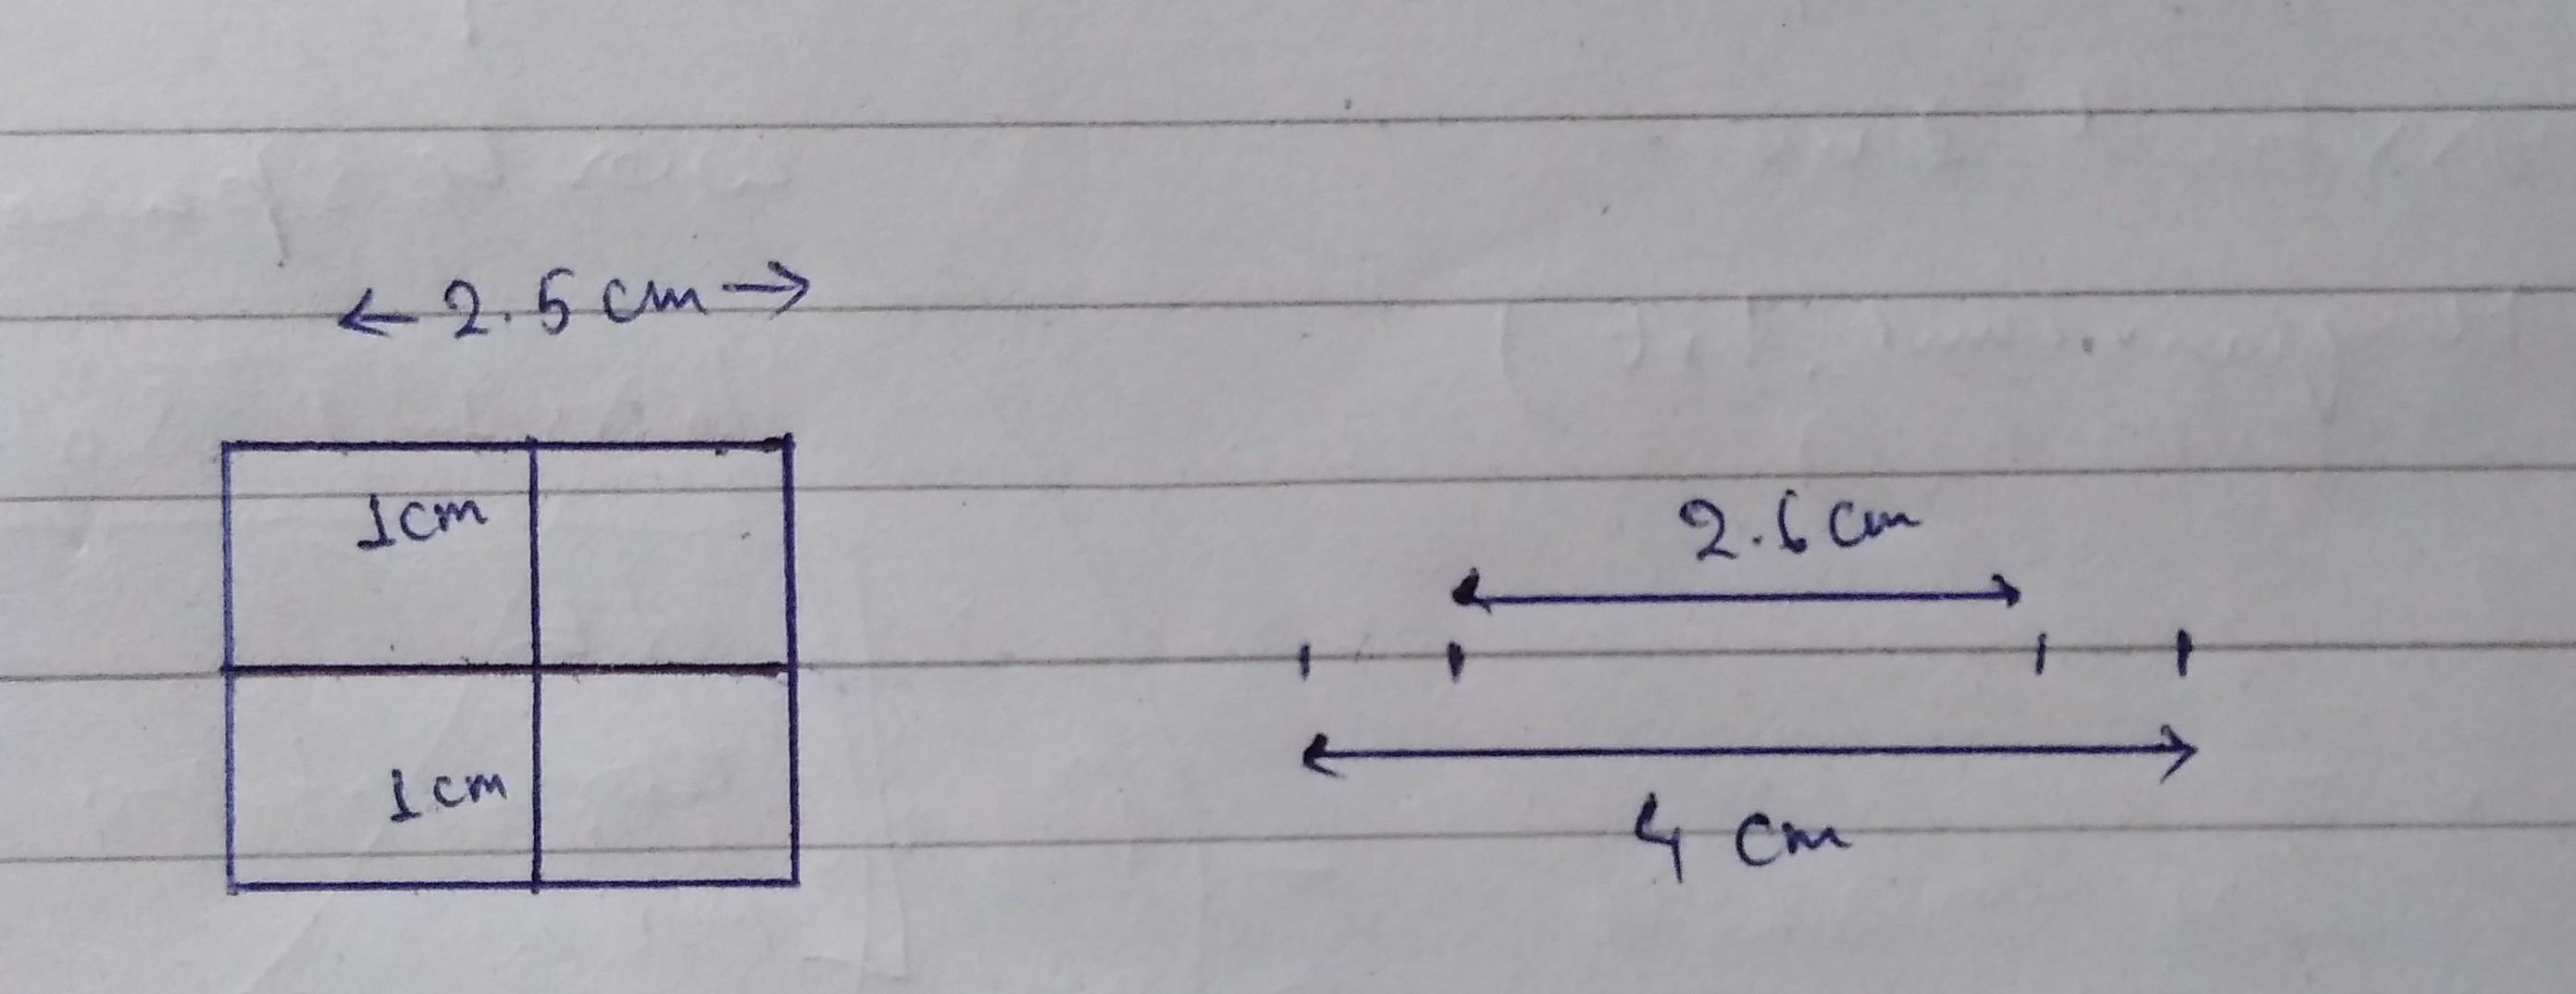

In [4]:
# read & show the dimensions image

from IPython import display
display.display(display.Image('C:/Users/DAR9KOR/Desktop/data/sample_datasets/defect_detection/1_data/length_calculation/actual_length.jpg'))

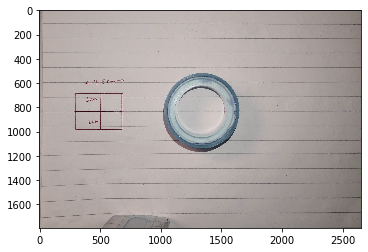

In [13]:
# load & see the image

image = cv2.imread('obj1.jpg')
showimage(image)

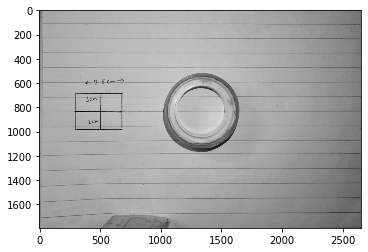

In [12]:
# load the image, convert it to grayscale, and blur it slightly
#image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)  # the tuple is the gaussian Kernel : controls the amount of blurring

showimage(gray)

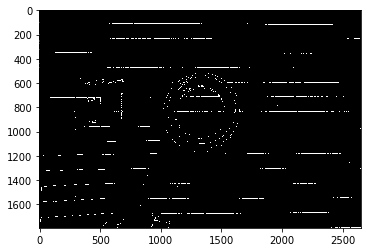

In [14]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
showimage(edged)
#edged = cv2.dilate(edged, None, iterations=1)
#edged = cv2.erode(edged, None, iterations=1)

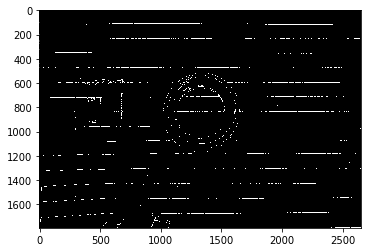

In [15]:
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
showimage(edged)

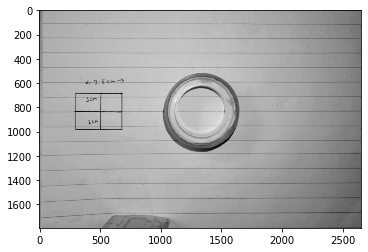

In [24]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (13,11), 0)  # the tuple is the gaussian Kernel : controls the amount of blurring

showimage(gray)

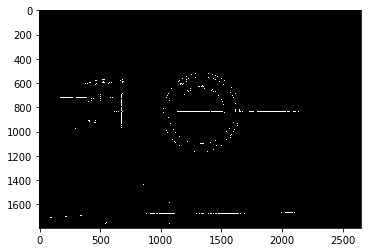

In [25]:
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
showimage(edged)

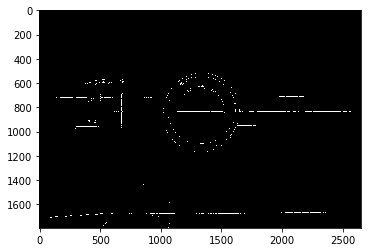

In [26]:
edged = cv2.Canny(gray, 35, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
showimage(edged)